## Loading libraries

In [ ]:
import pandas as pd
import numpy as np
import datetime
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)
import re

## Loading data

In [ ]:
data = pd.read_csv('/content/lesson_4.05_data.csv') # this file is in files_for_lesson_and_activities folder
data.head()

,HV1,IC1,IC5,CARDPROM,NUMPRM12,NGIFTALL,TIMELAG,year,GENDER,HOMEOWNR,DOMAIN_letters,RFA_frequency,RFA_monetary,AVGGIFT
0,479,307,12883,27,14,31,4.0,37.000000,F,other,T,4,E,7.741935
1,5468,1088,36175,12,13,3,18.0,52.000000,M,H,S,2,G,15.666667
2,497,251,11576,26,14,27,12.0,37.570799,M,U,R,4,E,7.481481
3,1000,386,15130,27,14,16,9.0,28.000000,F,U,R,4,E,6.812500
4,576,240,9836,43,25,37,14.0,20.000000,F,H,S,2,F,6.864865


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88393 entries, 0 to 88392
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   HV1             88393 non-null  int64  
 1   IC1             88393 non-null  int64  
 2   IC5             88393 non-null  int64  
 3   CARDPROM        88393 non-null  int64  
 4   NUMPRM12        88393 non-null  int64  
 5   NGIFTALL        88393 non-null  int64  
 6   TIMELAG         88393 non-null  float64
 7   year            88393 non-null  float64
 8   GENDER          88393 non-null  object 
 9   HOMEOWNR        88393 non-null  object 
 10  DOMAIN_letters  88393 non-null  object 
 11  RFA_frequency   88393 non-null  int64  
 12  RFA_monetary    88393 non-null  object 
 13  AVGGIFT         88393 non-null  float64
dtypes: float64(3), int64(7), object(4)
memory usage: 9.4+ MB


## Splitting the dataset between the categorical and numerical columns

In [ ]:
categoricals = data.select_dtypes(np.object)
numericals = data.select_dtypes(np.number)


print("Dataframe of numerical columns: ")
print()

display(numericals)

print("Dataframe of categorical columns: ")
print()

display(categoricals)

Dataframe of numerical columns: 



,HV1,IC1,IC5,CARDPROM,NUMPRM12,NGIFTALL,TIMELAG,year,RFA_frequency,AVGGIFT
0,479,307,12883,27,14,31,4.000000,37.000000,4,7.741935
1,5468,1088,36175,12,13,3,18.000000,52.000000,2,15.666667
2,497,251,11576,26,14,27,12.000000,37.570799,4,7.481481
3,1000,386,15130,27,14,16,9.000000,28.000000,4,6.812500
4,576,240,9836,43,25,37,14.000000,20.000000,2,6.864865
...,...,...,...,...,...,...,...,...,...,...
88388,733,285,11390,23,12,24,3.000000,48.000000,4,3.375000
88389,988,433,18807,6,12,1,8.117886,37.570799,1,25.000000
88390,1679,806,26538,4,8,1,8.117886,50.000000,1,20.000000
88391,376,263,12178,14,17,7,3.000000,38.000000,3,8.285714


Dataframe of categorical columns: 



,GENDER,HOMEOWNR,DOMAIN_letters,RFA_monetary
0,F,other,T,E
1,M,H,S,G
2,M,U,R,E
3,F,U,R,E
4,F,H,S,F
...,...,...,...,...
88388,F,H,S,D
88389,M,other,C,G
88390,M,H,C,F
88391,M,other,C,E


## Dummifying categorical columns

In [ ]:
cat_encoded = pd.get_dummies(categoricals, drop_first=True)
cat_encoded.head()

## Alternative way to do it. However, you will have to load the corresponding libraries of sklearn.
#encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(categoricals)
#encoded = encoder.transform(categoricals).toarray()

,GENDER_M,GENDER_other,HOMEOWNR_U,HOMEOWNR_other,DOMAIN_letters_R,DOMAIN_letters_S,DOMAIN_letters_T,DOMAIN_letters_U,RFA_monetary_E,RFA_monetary_F,RFA_monetary_G
0,0,0,0,1,0,0,1,0,1,0,0
1,1,0,0,0,0,1,0,0,0,0,1
2,1,0,1,0,1,0,0,0,1,0,0
3,0,0,1,0,1,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0,0,1,0


## Putting everything together

In [ ]:
full = pd.concat([numericals.iloc[:,:-1],cat_encoded,numericals.iloc[:,-1]],axis=1)
print("The dataset size is: ", full.shape)
print()
full

The dataset size is:  (88393, 21)



,HV1,IC1,IC5,CARDPROM,NUMPRM12,NGIFTALL,TIMELAG,year,RFA_frequency,GENDER_M,GENDER_other,HOMEOWNR_U,HOMEOWNR_other,DOMAIN_letters_R,DOMAIN_letters_S,DOMAIN_letters_T,DOMAIN_letters_U,RFA_monetary_E,RFA_monetary_F,RFA_monetary_G,AVGGIFT
0,479,307,12883,27,14,31,4.000000,37.000000,4,0,0,0,1,0,0,1,0,1,0,0,7.741935
1,5468,1088,36175,12,13,3,18.000000,52.000000,2,1,0,0,0,0,1,0,0,0,0,1,15.666667
2,497,251,11576,26,14,27,12.000000,37.570799,4,1,0,1,0,1,0,0,0,1,0,0,7.481481
3,1000,386,15130,27,14,16,9.000000,28.000000,4,0,0,1,0,1,0,0,0,1,0,0,6.812500
4,576,240,9836,43,25,37,14.000000,20.000000,2,0,0,0,0,0,1,0,0,0,1,0,6.864865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88388,733,285,11390,23,12,24,3.000000,48.000000,4,0,0,0,0,0,1,0,0,0,0,0,3.375000
88389,988,433,18807,6,12,1,8.117886,37.570799,1,1,0,0,1,0,0,0,0,0,0,1,25.000000
88390,1679,806,26538,4,8,1,8.117886,50.000000,1,1,0,0,0,0,0,0,0,0,1,0,20.000000
88391,376,263,12178,14,17,7,3.000000,38.000000,3,1,0,0,1,0,0,0,0,1,0,0,8.285714


In [ ]:
full.columns.tolist()

['HV1',
 'IC1',
 'IC5',
 'CARDPROM',
 'NUMPRM12',
 'NGIFTALL',
 'TIMELAG',
 'year',
 'RFA_frequency',
 'GENDER_M',
 'GENDER_other',
 'HOMEOWNR_U',
 'HOMEOWNR_other',
 'DOMAIN_letters_R',
 'DOMAIN_letters_S',
 'DOMAIN_letters_T',
 'DOMAIN_letters_U',
 'RFA_monetary_E',
 'RFA_monetary_F',
 'RFA_monetary_G',
 'AVGGIFT']

## Use the standard scaler on numerical columns.

In [ ]:
from sklearn.preprocessing import StandardScaler

transformer = StandardScaler().fit(full.iloc[:,:-1])
x_standardized = transformer.transform(full.iloc[:,:-1])

Getting a dataframe with the result from the standard scaler which is a numpy array.

As the numpy arrays doesn't have column names, we pick the column names from the full dataframe.

In [ ]:
full_standardized = pd.DataFrame(x_standardized,columns=full.columns.tolist()[:-1])
full_standardized.head()
X = full_standardized
y = full['AVGGIFT']

## Splitting data intro train and test sets.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

## Training the K-NN model

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=4) # The keyword "n_neighbors" is what sets the K.
knn_model.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                    weights='uniform')

## Getting our predictions

In [ ]:
knn_predictions = knn_model.predict(X_test)

## Getting the error metrics of our K-NN model

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

MAE = mean_absolute_error(y_test,knn_predictions)
MSE = mean_squared_error(y_test,knn_predictions)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test,knn_predictions)

print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
print("The R2 of the model in the test set is: %4.2f" % (R2))

The mean absolute error of the model in the test set is:   3.46
The mean squared error of the model in the test set is:  56.88
The root mean squared error of the model in the test set is:   7.54
The R2 of the model in the test set is: 0.17


# Activity

Train a linear model and compare the performace of both models in the test set.


In [ ]:
from sklearn import linear_model

lm = linear_model.LinearRegression()
lm_model = lm.fit(X_train,y_train)

In [ ]:
lm_predictions = lm_model.predict(X_test)

In [ ]:
MAE = mean_absolute_error(y_test,lm_predictions)
MSE = mean_squared_error(y_test,lm_predictions)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test,lm_predictions)

print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
print("The R2 of the model in the test set is: %4.2f" % (R2))

The mean absolute error of the model in the test set is:   3.25
The mean squared error of the model in the test set is:  36.30
The root mean squared error of the model in the test set is:   6.02
The R2 of the model in the test set is: 0.47


K 
Let's try to find the best K value from a pre-defined set of values.

In [ ]:
scores = [] # We will store here the R2 values for each of our K-NN models with different K-values.
for i in range(2,10): # The values of K. = 2,3,4,5,6,7,8,9
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

Now let's plot how it changes the score as a function of K.

Text(0, 0.5, 'R2')

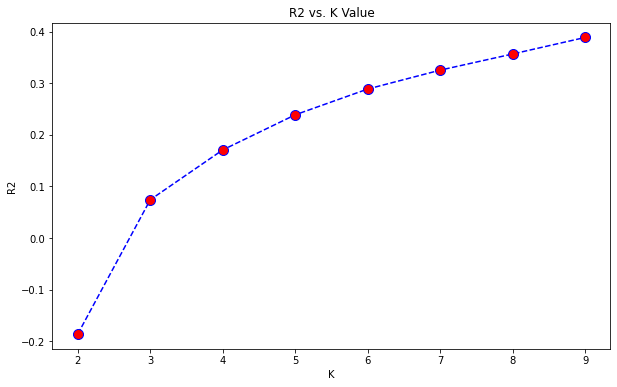

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(2,10),scores,color = 'blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)
plt.title('R2 vs. K Value')
plt.xlabel('K')
plt.ylabel('R2')

#threshold = 0.01 # minimum difference we want between two R2 consecutive values.
#delta = 10. # difference between two consecutive R2 values.
#k = 3 # initival value
#old_score = 0.

#while (delta >= threshold):
#  knn_model = KNeighborsRegressor(n_neighbors=k) # The keyword "n_neighbors" is what sets the K.
#  knn_model.fit(X_train, y_train)
#  knn_predictions = knn_model.predict(X_test) 
#  new_score = r2_score(y_test,knn_predictions)
#  delta = new_score - old_score
#  k = k + 4 
#  old_score = new_score

# Activity

If you think a little bit about it, the number of neighbors might be very important for our results, but will it be the only parameter that matters? Go to the documentation and check the parameters and the values they can take, pick the one you think is more relevant and change its value in the model. Hint: If K (number of neighbors) is the most important one, maybe we could measure the way these K instances affect our prediction

In [ ]:
uniform_model = KNeighborsRegressor(n_neighbors=9)
uniform_model.fit(X_train, y_train)
uniform_model.score(X_test, y_test)

0.38885010392472197

In [ ]:
distance_model = KNeighborsRegressor(n_neighbors=9, weights = "distance")
distance_model.fit(X_train, y_train)
distance_model.score(X_test, y_test)

0.3852744437905987

# Activity

Let's visualize how KNN actually works. First of all install the mlxtend library and create a dataframe containing the two most relevant numerical variables and the target, in that order. Once you have done it sample it with n = 100, introduce that sample into this function with an arbitrary k:

Let's visualize how KNN actually works. First of all install the mlxtend library and create a dataframe containing the two most relevant numerical variables and the target, in that order. Once you have done it sample it with n = 100, introduce that sample into this function with an arbitrary k:

In [ ]:
from mlxtend.plotting import plot_decision_regions

In [ ]:
def knn_comparison(data, k):
    x = data.iloc[:, 0:2].values
    y = data.iloc[:, -1].astype(int).values
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(x, y)

    plt.figure(figsize=(16,12))
    plot_decision_regions(x, y, clf=knn)
    plt.title("Knn with K="+ str(k), fontsize = 18)
    plt.show()

In [ ]:
new = pd.concat([X,y],axis=1)
new = new[['HV1','IC1','AVGGIFT']].sample(n=100,random_state=100)
new.head()

,HV1,IC1,AVGGIFT
25703,-0.812773,-1.142234,16.125000
14213,-0.393145,0.407549,12.333333
79506,0.649504,-0.222244,15.000000
2643,-0.336409,-0.679152,6.166667
27907,-0.378158,-0.055534,35.000000


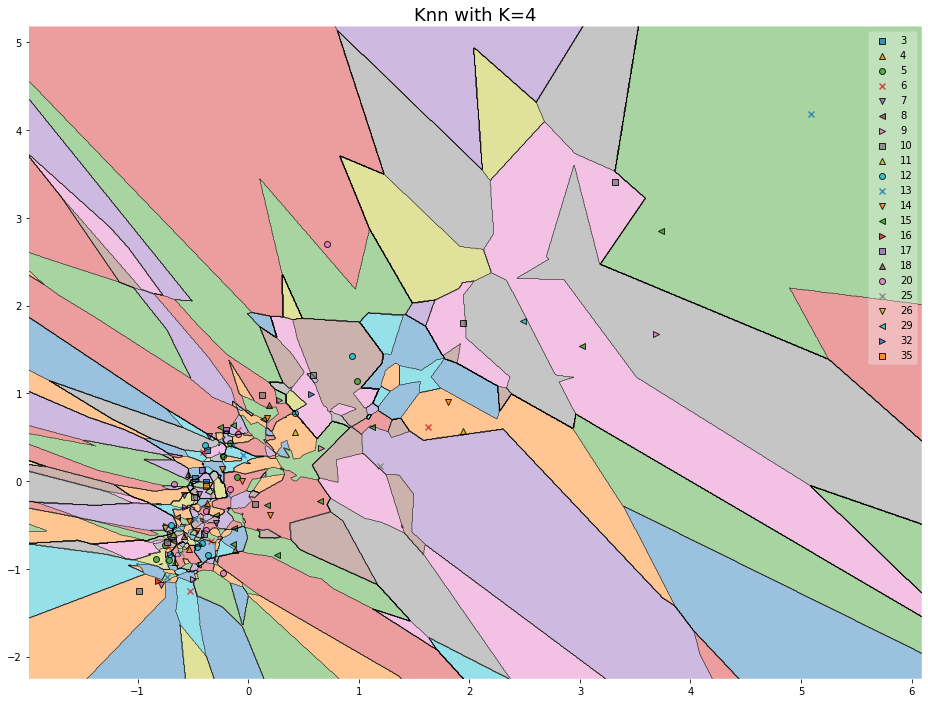

In [ ]:
knn_comparison(new,4)

What can you see in the plot? 

Now try to create a function plot_knn_boundaries to loop over the previous function and iterate over the ks = [1, 3, 5, 10, 25, 50]. And now, can you tell the difference between the plots?

In [ ]:
def plot_knn_boundaries(data, ks = [1, 3, 5, 10, 25, 50]):
    for i in ks:
        knn_comparison(data, i)

The lower the number of k the more over-fitted it will be. We can see that with k = 1, the boundaries are very clear and as we increase k the plots start turning very messy until the last two plots, where it is oversimplified.

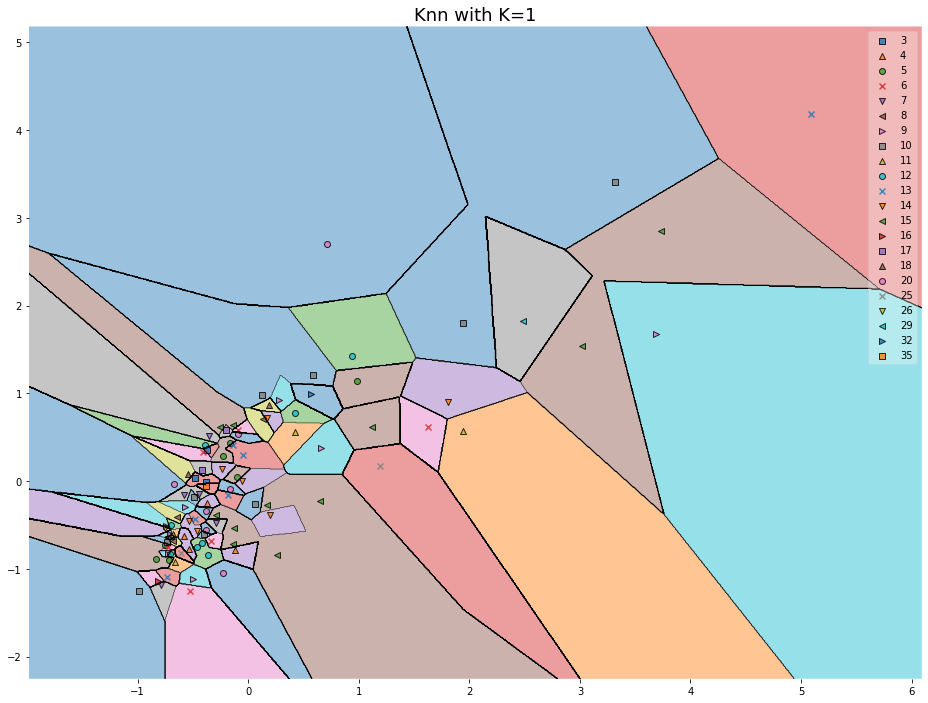

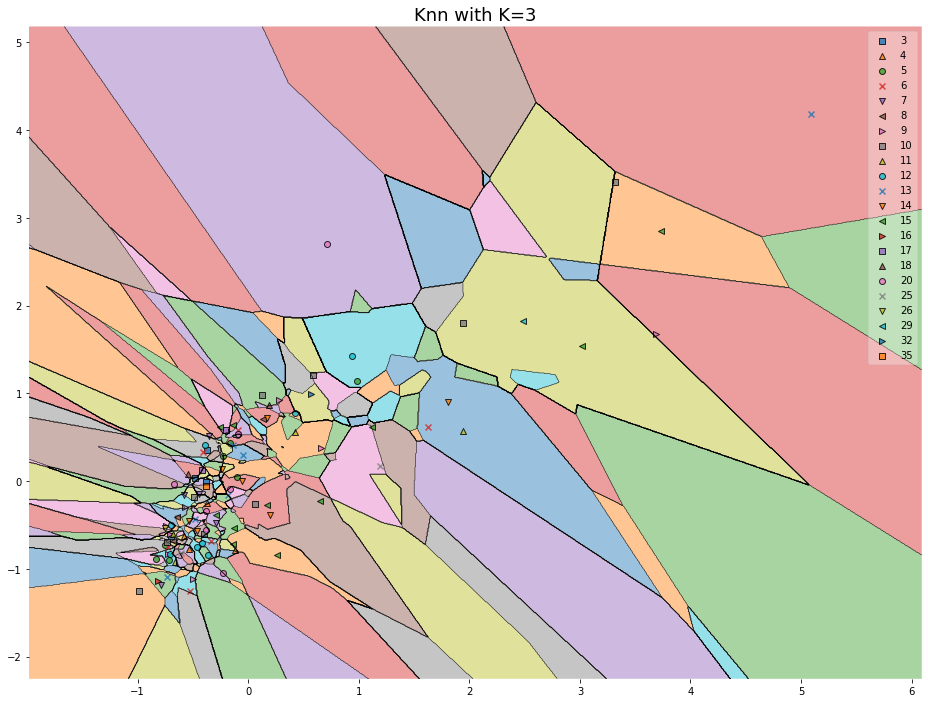

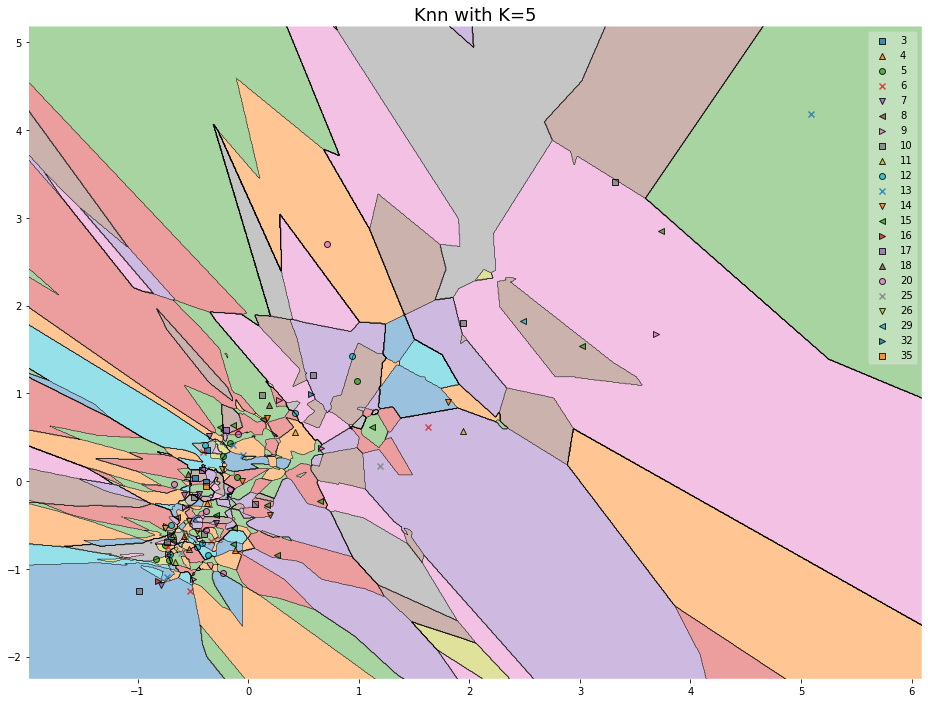

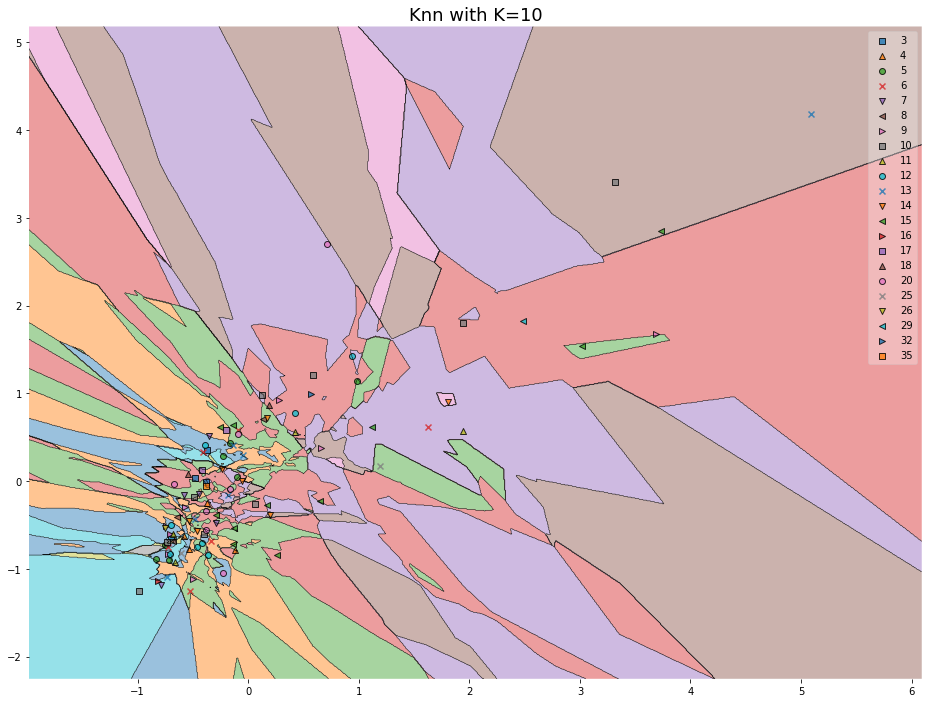

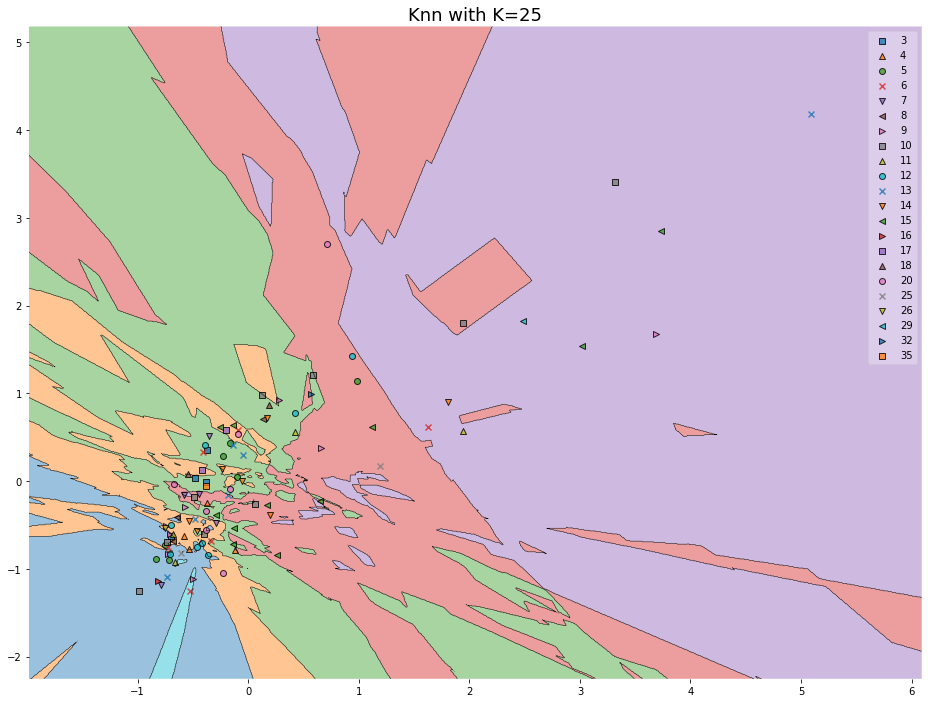

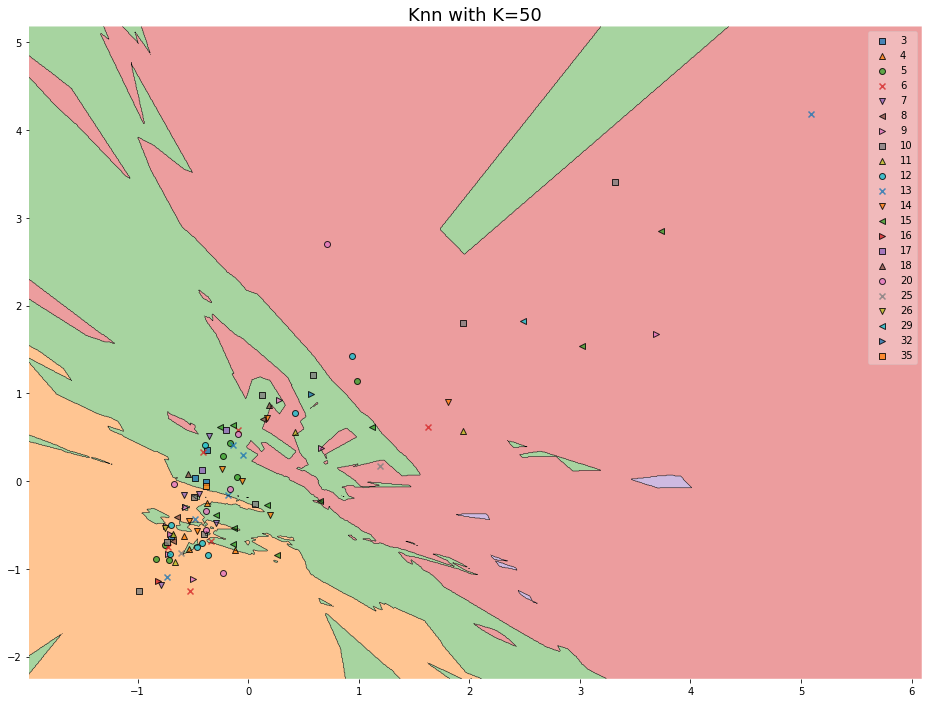

In [ ]:
plot_knn_boundaries(new)

R2adj can be computed as:

In [ ]:
score_adj = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

# Activity:

From all the regression metrics we have seen, which one do you think is the one to use in most cases?

Calculate and plot R2, MSE, RMSE, and MAE.

We have seen R2, MSE, RMSE and MAE. Of course, there is not a magic solution for which you should always use it, but there are some details worth knowing:

*  R2 is scaled, which means that it is independent of the data. This one would be the one to go with if we don't know a lot about the data and general information about our model. However, it can be misleading, as it is supposed to be between 0 and 1 but sometimes it is not (you can read about it here. In fact, R2 is a biased estimator (more information here.

*  MAE would be the median of the regression metrics as what it measures is the sum of distances between predicted and real values (errors), and that won't give a special treat to really bad predictions, so if that's what we want this metric should do great.

*  MSE - It is the mean of the squared distance of the errors, which will weight the bad predictions.

*  RMSE - Root MSE, essentially it is the same but it is easier to understand within the data context

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test, y_pred))
print('Adjusted R:',  1 - (1-metrics.r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

Mean Absolute Error: 3.2472804594111917
Mean Squared Error: 36.29947025924502
Root Mean Squared Error: 6.024904170129598
R2: 0.4708430678680021
Adjusted R: 0.4704436589295321
